### Problem State

PredCatch Analytics' Australian banking client's profitability and reputation are being hit by fraudulent ATM transactions. They want PredCatch to help them in reducing and if possible completely eliminating such fraudulent transactions. PredCatch believes it can do the same by building a predictive model to catch such fraudulent transactions in real time and decline them. Your job as PredCatch's Data Scientist is to build this fraud detection & prevention predictive model in the first step. If successful, in the 2nd step you will have to present your solutions and explain how it works to the client. The data has been made available to you. The challenging part of the problem is that the data contains very few fraud instances in comparison to the overall population. To give more edge to the solution they have also collected data regarding location [geo_scores] of the transactions, their own proprietary index [Lambda_wts], on network turn around times [Qset_tats] and vulnerability qualification score [instance_scores]. As of now you don't need to understand what they mean.Training data contains masked variables pertaining to each transaction id . Your prediction target here is 'Target' .

### IMPORTING LIBRARIES

In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

### IMPORTING ALL THE 5 DATAS AVAILABLE TO US

In [2]:
data1 = pd.read_csv('train.csv')
data1.head()

,id,Group,Per1,Per2,Per3,Per4,Per5,Per6,Per7,Per8,...,Dem8,Dem9,Cred1,Cred2,Cred3,Cred4,Cred5,Cred6,Normalised_FNT,Target
0,112751,Grp169,1.070000,0.580000,0.480000,0.766667,1.233333,1.993333,0.340000,1.010000,...,0.680000,0.726667,0.606667,1.010000,0.933333,0.603333,0.686667,0.673333,-245.7500,0
1,18495,Grp161,0.473333,1.206667,0.883333,1.430000,0.726667,0.626667,0.810000,0.783333,...,0.716667,0.743333,0.680000,0.690000,0.560000,0.670000,0.553333,0.653333,-248.0000,0
2,23915,Grp261,1.130000,0.143333,0.946667,0.123333,0.080000,0.836667,0.056667,0.756667,...,0.690000,0.820000,0.600000,0.383333,0.763333,0.670000,0.686667,0.673333,-233.1250,0
3,50806,Grp198,0.636667,1.090000,0.750000,0.940000,0.743333,0.346667,0.956667,0.633333,...,0.720000,0.900000,0.680000,0.846667,0.423333,0.520000,0.846667,0.760000,-249.7775,0
4,184244,Grp228,0.560000,1.013333,0.593333,0.416667,0.773333,0.460000,0.853333,0.796667,...,0.603333,0.486667,0.693333,0.526667,0.520000,0.716667,0.706667,0.673333,-247.5775,0


In [3]:
data1.shape

(227845, 28)

In [4]:
data1.dtypes

id                  int64
Group              object
Per1              float64
Per2              float64
Per3              float64
Per4              float64
Per5              float64
Per6              float64
Per7              float64
Per8              float64
Per9              float64
Dem1              float64
Dem2              float64
Dem3              float64
Dem4              float64
Dem5              float64
Dem6              float64
Dem7              float64
Dem8              float64
Dem9              float64
Cred1             float64
Cred2             float64
Cred3             float64
Cred4             float64
Cred5             float64
Cred6             float64
Normalised_FNT    float64
Target              int64
dtype: object

- Checking missing values

In [5]:
#checking missing values
data1.isnull().sum()

id                0
Group             0
Per1              0
Per2              0
Per3              0
Per4              0
Per5              0
Per6              0
Per7              0
Per8              0
Per9              0
Dem1              0
Dem2              0
Dem3              0
Dem4              0
Dem5              0
Dem6              0
Dem7              0
Dem8              0
Dem9              0
Cred1             0
Cred2             0
Cred3             0
Cred4             0
Cred5             0
Cred6             0
Normalised_FNT    0
Target            0
dtype: int64

- Checking duplicate values

In [6]:
data1.duplicated().sum()

0

In [7]:
data1['Target'].value_counts()

Target
0    227451
1       394
Name: count, dtype: int64

In [8]:
data1['Target'].value_counts()/len(data1['Target']) * 100

Target
0    99.827075
1     0.172925
Name: count, dtype: float64

- Target - Percentage of 1 and 0

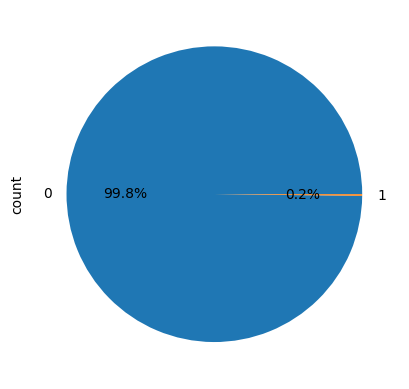

In [59]:
data1['Target'].value_counts().plot(kind='pie',autopct='%1.1f%%')
plt.show()

In [10]:
data1.describe()

,id,Per1,Per2,Per3,Per4,Per5,Per6,Per7,Per8,Per9,...,Dem8,Dem9,Cred1,Cred2,Cred3,Cred4,Cred5,Cred6,Normalised_FNT,Target
count,227845.000000,227845.000000,227845.000000,227845.000000,227845.000000,227845.000000,227845.000000,227845.000000,227845.000000,227845.000000,...,227845.000000,227845.000000,227845.000000,227845.000000,227845.000000,227845.000000,227845.000000,227845.000000,227845.000000,227845.000000
mean,142404.076201,0.666006,0.667701,0.666315,0.666687,0.666723,0.667378,0.666934,0.666279,0.666688,...,0.666540,0.666535,0.666684,0.666264,0.666755,0.666878,0.666566,0.666776,-227.954170,0.001729
std,82170.248170,0.654133,0.548305,0.506357,0.471956,0.461393,0.444573,0.415657,0.401546,0.366537,...,0.244423,0.241902,0.207575,0.202204,0.174204,0.160803,0.135762,0.111612,61.951661,0.041548
min,0.000000,-18.136667,-23.573333,-15.443333,-1.226667,-37.246667,-8.053333,-13.853333,-23.740000,-3.810000,...,-10.943333,-2.296667,-14.270000,-0.280000,-2.766667,-0.080000,-6.856667,-4.476667,-250.000000,0.000000
25%,71325.000000,0.360000,0.470000,0.370000,0.383333,0.436667,0.410000,0.483333,0.596667,0.453333,...,0.590000,0.486667,0.613333,0.546667,0.560000,0.556667,0.643333,0.650000,-248.617500,0.000000
50%,142374.000000,0.670000,0.690000,0.726667,0.660000,0.650000,0.576667,0.680000,0.673333,0.650000,...,0.656667,0.670000,0.663333,0.680000,0.673333,0.650000,0.666667,0.670000,-244.510000,0.000000
75%,213492.000000,1.103333,0.933333,1.010000,0.913333,0.870000,0.800000,0.856667,0.776667,0.866667,...,0.730000,0.843333,0.716667,0.813333,0.783333,0.746667,0.696667,0.693333,-230.750000,0.000000
max,284805.000000,1.483333,8.020000,3.793333,6.163333,12.266667,25.100000,40.863333,7.336667,5.863333,...,9.733333,4.166667,8.176667,2.193333,3.173333,1.840000,11.203333,11.950000,6172.790000,1.000000


- Next data - data regarding location [geo_scores] of the transactions

In [11]:
data2 = pd.read_csv('Geo_scores.csv')
data2.head()

,id,geo_score
0,26674,4.48
1,204314,4.48
2,176521,5.17
3,48812,-2.41
4,126870,6.55


In [12]:
#checking missing values

data2.isnull().sum()

id               0
geo_score    71543
dtype: int64

In [13]:
#Hnadling missing values

data2['geo_score'].fillna(data2['geo_score'].median(),inplace=True)
data2.isnull().sum()

id           0
geo_score    0
dtype: int64

In [14]:
data2.duplicated().sum()

55349

In [15]:
#Handling duplicate values

data_2 = data2.drop_duplicates(subset = 'id')
data_2.duplicated().sum()

0

- 3rd Data - their own proprietary index [Lambda_wts]

In [16]:
data3 = pd.read_csv('Lambda_wts.csv')
data3.head()

,Group,lambda_wt
0,Grp936,3.41
1,Grp347,-2.88
2,Grp188,0.39
3,Grp1053,-2.75
4,Grp56,-0.83


In [17]:
data3.isnull().sum()

Group        0
lambda_wt    0
dtype: int64

In [18]:
data3.duplicated().sum()

0

In [19]:
#no missing values

data3.describe()

,lambda_wt
count,1400.000000
mean,-2.128736
std,5.148553
min,-19.210000
25%,-5.295000
50%,-1.615000
75%,1.882500
max,10.530000


- 4th Data - on network turn around times [Qset_tats] 

In [21]:
data4 = pd.read_csv('Qset_tats.csv')
data4.head()

,id,qsets_normalized_tat
0,9983,2.41
1,266000,3.10
2,77525,1.03
3,160765,-11.63
4,138220,-4.48


In [22]:
data4.isnull().sum()

id                           0
qsets_normalized_tat    103201
dtype: int64

In [23]:
data4['qsets_normalized_tat'].fillna(data4['qsets_normalized_tat'].median(),inplace=True)
data4.isnull().sum()

id                      0
qsets_normalized_tat    0
dtype: int64

In [24]:
data4.duplicated().sum()

59314

In [25]:
data_4 = data4.drop_duplicates(subset='id')
data_4.duplicated().sum()

0

- 5th Data - vulnerability qualification score [instance_scores]

In [26]:
data5 = pd.read_csv('instance_scores.csv')
data5.head()

,id,instance_scores
0,173444,-0.88
1,259378,1.50
2,161170,0.44
3,191161,0.76
4,34521,-0.84


In [27]:
data5.isnull().sum()

id                 0
instance_scores    0
dtype: int64

In [28]:
data5.duplicated().sum()

33600

In [29]:
data_5 = data5.drop_duplicates(subset='id')
data_5.duplicated().sum()

0

### MERGING THE DATASETS TOGETHER:

In [30]:
dataset1 = pd.merge(data1,data3,on='Group')
dataset1.head(10)

,id,Group,Per1,Per2,Per3,Per4,Per5,Per6,Per7,Per8,...,Dem9,Cred1,Cred2,Cred3,Cred4,Cred5,Cred6,Normalised_FNT,Target,lambda_wt
0,112751,Grp169,1.070000,0.580000,0.480000,0.766667,1.233333,1.993333,0.340000,1.010000,...,0.726667,0.606667,1.010000,0.933333,0.603333,0.686667,0.673333,-245.7500,0,-0.13
1,87492,Grp169,1.010000,0.470000,1.033333,0.656667,0.383333,0.936667,0.353333,0.826667,...,0.720000,0.696667,0.596667,0.636667,1.010000,0.663333,0.666667,-241.0125,0,-0.13
2,22286,Grp169,0.996667,0.346667,0.856667,0.166667,0.333333,0.700000,0.450000,0.726667,...,0.926667,0.586667,0.600000,0.810000,0.676667,0.683333,0.676667,-220.6000,0,-0.13
3,93670,Grp169,1.070000,0.773333,0.776667,0.856667,0.570000,0.420000,0.666667,0.643333,...,0.433333,0.703333,0.763333,0.730000,0.693333,0.656667,0.673333,-249.6775,0,-0.13
4,184859,Grp169,0.526667,0.730000,0.810000,0.016667,0.773333,0.503333,1.000000,0.640000,...,1.036667,0.540000,0.950000,0.786667,0.973333,0.676667,0.706667,-236.0000,0,-0.13
5,242447,Grp169,1.320000,0.543333,0.410000,0.676667,0.713333,0.873333,0.490000,0.720000,...,0.546667,0.753333,0.593333,0.563333,0.460000,0.676667,0.653333,-242.5075,0,-0.13
6,2944,Grp169,0.853333,0.213333,0.940000,0.806667,0.313333,1.000000,0.470000,0.816667,...,0.583333,0.633333,0.593333,0.616667,0.976667,0.646667,0.680000,-181.1550,0,-0.13
7,534,Grp169,1.080000,0.836667,0.896667,1.230000,0.586667,0.450000,0.706667,0.590000,...,0.606667,0.680000,0.823333,0.763333,0.956667,0.643333,0.670000,-250.0000,0,-0.13
8,182042,Grp169,1.306667,0.186667,0.530000,0.466667,0.300000,0.876667,0.213333,0.766667,...,0.476667,0.760000,0.683333,0.433333,0.813333,0.660000,0.656667,-223.8625,0,-0.13
9,107120,Grp169,0.843333,0.196667,0.936667,0.810000,0.306667,1.000000,0.476667,0.813333,...,0.580000,0.630000,0.593333,0.613333,0.973333,0.646667,0.683333,-177.2500,0,-0.13


In [31]:
dataset2 = pd.merge(dataset1,data_2,on='id')
dataset2.head(10)

,id,Group,Per1,Per2,Per3,Per4,Per5,Per6,Per7,Per8,...,Cred1,Cred2,Cred3,Cred4,Cred5,Cred6,Normalised_FNT,Target,lambda_wt,geo_score
0,112751,Grp169,1.070000,0.580000,0.480000,0.766667,1.233333,1.993333,0.340000,1.010000,...,0.606667,1.010000,0.933333,0.603333,0.686667,0.673333,-245.7500,0,-0.13,18.68
1,87492,Grp169,1.010000,0.470000,1.033333,0.656667,0.383333,0.936667,0.353333,0.826667,...,0.696667,0.596667,0.636667,1.010000,0.663333,0.666667,-241.0125,0,-0.13,8.62
2,22286,Grp169,0.996667,0.346667,0.856667,0.166667,0.333333,0.700000,0.450000,0.726667,...,0.586667,0.600000,0.810000,0.676667,0.683333,0.676667,-220.6000,0,-0.13,2.41
3,93670,Grp169,1.070000,0.773333,0.776667,0.856667,0.570000,0.420000,0.666667,0.643333,...,0.703333,0.763333,0.730000,0.693333,0.656667,0.673333,-249.6775,0,-0.13,12.73
4,184859,Grp169,0.526667,0.730000,0.810000,0.016667,0.773333,0.503333,1.000000,0.640000,...,0.540000,0.950000,0.786667,0.973333,0.676667,0.706667,-236.0000,0,-0.13,22.53
5,242447,Grp169,1.320000,0.543333,0.410000,0.676667,0.713333,0.873333,0.490000,0.720000,...,0.753333,0.593333,0.563333,0.460000,0.676667,0.653333,-242.5075,0,-0.13,17.94
6,2944,Grp169,0.853333,0.213333,0.940000,0.806667,0.313333,1.000000,0.470000,0.816667,...,0.633333,0.593333,0.616667,0.976667,0.646667,0.680000,-181.1550,0,-0.13,-5.86
7,534,Grp169,1.080000,0.836667,0.896667,1.230000,0.586667,0.450000,0.706667,0.590000,...,0.680000,0.823333,0.763333,0.956667,0.643333,0.670000,-250.0000,0,-0.13,4.15
8,182042,Grp169,1.306667,0.186667,0.530000,0.466667,0.300000,0.876667,0.213333,0.766667,...,0.760000,0.683333,0.433333,0.813333,0.660000,0.656667,-223.8625,0,-0.13,-3.16
9,107120,Grp169,0.843333,0.196667,0.936667,0.810000,0.306667,1.000000,0.476667,0.813333,...,0.630000,0.593333,0.613333,0.973333,0.646667,0.683333,-177.2500,0,-0.13,-5.17


In [32]:
dataset3 = pd.merge(dataset2,data_4,on='id')
dataset3.head(10)

,id,Group,Per1,Per2,Per3,Per4,Per5,Per6,Per7,Per8,...,Cred2,Cred3,Cred4,Cred5,Cred6,Normalised_FNT,Target,lambda_wt,geo_score,qsets_normalized_tat
0,112751,Grp169,1.070000,0.580000,0.480000,0.766667,1.233333,1.993333,0.340000,1.010000,...,1.010000,0.933333,0.603333,0.686667,0.673333,-245.7500,0,-0.13,18.68,4.48
1,87492,Grp169,1.010000,0.470000,1.033333,0.656667,0.383333,0.936667,0.353333,0.826667,...,0.596667,0.636667,1.010000,0.663333,0.666667,-241.0125,0,-0.13,8.62,3.79
2,22286,Grp169,0.996667,0.346667,0.856667,0.166667,0.333333,0.700000,0.450000,0.726667,...,0.600000,0.810000,0.676667,0.683333,0.676667,-220.6000,0,-0.13,2.41,1.72
3,93670,Grp169,1.070000,0.773333,0.776667,0.856667,0.570000,0.420000,0.666667,0.643333,...,0.763333,0.730000,0.693333,0.656667,0.673333,-249.6775,0,-0.13,12.73,-5.14
4,184859,Grp169,0.526667,0.730000,0.810000,0.016667,0.773333,0.503333,1.000000,0.640000,...,0.950000,0.786667,0.973333,0.676667,0.706667,-236.0000,0,-0.13,22.53,2.41
5,242447,Grp169,1.320000,0.543333,0.410000,0.676667,0.713333,0.873333,0.490000,0.720000,...,0.593333,0.563333,0.460000,0.676667,0.653333,-242.5075,0,-0.13,17.94,-3.79
6,2944,Grp169,0.853333,0.213333,0.940000,0.806667,0.313333,1.000000,0.470000,0.816667,...,0.593333,0.616667,0.976667,0.646667,0.680000,-181.1550,0,-0.13,-5.86,-5.17
7,534,Grp169,1.080000,0.836667,0.896667,1.230000,0.586667,0.450000,0.706667,0.590000,...,0.823333,0.763333,0.956667,0.643333,0.670000,-250.0000,0,-0.13,4.15,0.34
8,182042,Grp169,1.306667,0.186667,0.530000,0.466667,0.300000,0.876667,0.213333,0.766667,...,0.683333,0.433333,0.813333,0.660000,0.656667,-223.8625,0,-0.13,-3.16,-5.86
9,107120,Grp169,0.843333,0.196667,0.936667,0.810000,0.306667,1.000000,0.476667,0.813333,...,0.593333,0.613333,0.973333,0.646667,0.683333,-177.2500,0,-0.13,-5.17,1.03


In [33]:
#Final Dataset

dataset4 = pd.merge(dataset3,data_5,on='id')
dataset4.head(10)

,id,Group,Per1,Per2,Per3,Per4,Per5,Per6,Per7,Per8,...,Cred3,Cred4,Cred5,Cred6,Normalised_FNT,Target,lambda_wt,geo_score,qsets_normalized_tat,instance_scores
0,112751,Grp169,1.070000,0.580000,0.480000,0.766667,1.233333,1.993333,0.340000,1.010000,...,0.933333,0.603333,0.686667,0.673333,-245.7500,0,-0.13,18.68,4.48,-0.36
1,87492,Grp169,1.010000,0.470000,1.033333,0.656667,0.383333,0.936667,0.353333,0.826667,...,0.636667,1.010000,0.663333,0.666667,-241.0125,0,-0.13,8.62,3.79,0.00
2,22286,Grp169,0.996667,0.346667,0.856667,0.166667,0.333333,0.700000,0.450000,0.726667,...,0.810000,0.676667,0.683333,0.676667,-220.6000,0,-0.13,2.41,1.72,-4.57
3,93670,Grp169,1.070000,0.773333,0.776667,0.856667,0.570000,0.420000,0.666667,0.643333,...,0.730000,0.693333,0.656667,0.673333,-249.6775,0,-0.13,12.73,-5.14,-0.84
4,184859,Grp169,0.526667,0.730000,0.810000,0.016667,0.773333,0.503333,1.000000,0.640000,...,0.786667,0.973333,0.676667,0.706667,-236.0000,0,-0.13,22.53,2.41,-0.72
5,242447,Grp169,1.320000,0.543333,0.410000,0.676667,0.713333,0.873333,0.490000,0.720000,...,0.563333,0.460000,0.676667,0.653333,-242.5075,0,-0.13,17.94,-3.79,-0.44
6,2944,Grp169,0.853333,0.213333,0.940000,0.806667,0.313333,1.000000,0.470000,0.816667,...,0.616667,0.976667,0.646667,0.680000,-181.1550,0,-0.13,-5.86,-5.17,-1.00
7,534,Grp169,1.080000,0.836667,0.896667,1.230000,0.586667,0.450000,0.706667,0.590000,...,0.763333,0.956667,0.643333,0.670000,-250.0000,0,-0.13,4.15,0.34,0.40
8,182042,Grp169,1.306667,0.186667,0.530000,0.466667,0.300000,0.876667,0.213333,0.766667,...,0.433333,0.813333,0.660000,0.656667,-223.8625,0,-0.13,-3.16,-5.86,0.76
9,107120,Grp169,0.843333,0.196667,0.936667,0.810000,0.306667,1.000000,0.476667,0.813333,...,0.613333,0.973333,0.646667,0.683333,-177.2500,0,-0.13,-5.17,1.03,-0.92


In [34]:
dataset4.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 227845 entries, 0 to 227844
Data columns (total 32 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   id                    227845 non-null  int64  
 1   Group                 227845 non-null  object 
 2   Per1                  227845 non-null  float64
 3   Per2                  227845 non-null  float64
 4   Per3                  227845 non-null  float64
 5   Per4                  227845 non-null  float64
 6   Per5                  227845 non-null  float64
 7   Per6                  227845 non-null  float64
 8   Per7                  227845 non-null  float64
 9   Per8                  227845 non-null  float64
 10  Per9                  227845 non-null  float64
 11  Dem1                  227845 non-null  float64
 12  Dem2                  227845 non-null  float64
 13  Dem3                  227845 non-null  float64
 14  Dem4                  227845 non-null  float64
 15  

In [35]:
dataset4.columns

Index(['id', 'Group', 'Per1', 'Per2', 'Per3', 'Per4', 'Per5', 'Per6', 'Per7',
       'Per8', 'Per9', 'Dem1', 'Dem2', 'Dem3', 'Dem4', 'Dem5', 'Dem6', 'Dem7',
       'Dem8', 'Dem9', 'Cred1', 'Cred2', 'Cred3', 'Cred4', 'Cred5', 'Cred6',
       'Normalised_FNT', 'Target', 'lambda_wt', 'geo_score',
       'qsets_normalized_tat', 'instance_scores'],
      dtype='object')

In [36]:
dataset4.shape

(227845, 32)

In [37]:
dataset5 = dataset4.drop('id',axis=1)
dataset5.head()

,Group,Per1,Per2,Per3,Per4,Per5,Per6,Per7,Per8,Per9,...,Cred3,Cred4,Cred5,Cred6,Normalised_FNT,Target,lambda_wt,geo_score,qsets_normalized_tat,instance_scores
0,Grp169,1.070000,0.580000,0.480000,0.766667,1.233333,1.993333,0.340000,1.010000,0.863333,...,0.933333,0.603333,0.686667,0.673333,-245.7500,0,-0.13,18.68,4.48,-0.36
1,Grp169,1.010000,0.470000,1.033333,0.656667,0.383333,0.936667,0.353333,0.826667,0.956667,...,0.636667,1.010000,0.663333,0.666667,-241.0125,0,-0.13,8.62,3.79,0.00
2,Grp169,0.996667,0.346667,0.856667,0.166667,0.333333,0.700000,0.450000,0.726667,1.220000,...,0.810000,0.676667,0.683333,0.676667,-220.6000,0,-0.13,2.41,1.72,-4.57
3,Grp169,1.070000,0.773333,0.776667,0.856667,0.570000,0.420000,0.666667,0.643333,0.580000,...,0.730000,0.693333,0.656667,0.673333,-249.6775,0,-0.13,12.73,-5.14,-0.84
4,Grp169,0.526667,0.730000,0.810000,0.016667,0.773333,0.503333,1.000000,0.640000,0.956667,...,0.786667,0.973333,0.676667,0.706667,-236.0000,0,-0.13,22.53,2.41,-0.72


In [38]:
dataset = dataset5.drop('Group',axis=1)
dataset.head()

,Per1,Per2,Per3,Per4,Per5,Per6,Per7,Per8,Per9,Dem1,...,Cred3,Cred4,Cred5,Cred6,Normalised_FNT,Target,lambda_wt,geo_score,qsets_normalized_tat,instance_scores
0,1.070000,0.580000,0.480000,0.766667,1.233333,1.993333,0.340000,1.010000,0.863333,0.460000,...,0.933333,0.603333,0.686667,0.673333,-245.7500,0,-0.13,18.68,4.48,-0.36
1,1.010000,0.470000,1.033333,0.656667,0.383333,0.936667,0.353333,0.826667,0.956667,1.150000,...,0.636667,1.010000,0.663333,0.666667,-241.0125,0,-0.13,8.62,3.79,0.00
2,0.996667,0.346667,0.856667,0.166667,0.333333,0.700000,0.450000,0.726667,1.220000,1.116667,...,0.810000,0.676667,0.683333,0.676667,-220.6000,0,-0.13,2.41,1.72,-4.57
3,1.070000,0.773333,0.776667,0.856667,0.570000,0.420000,0.666667,0.643333,0.580000,1.220000,...,0.730000,0.693333,0.656667,0.673333,-249.6775,0,-0.13,12.73,-5.14,-0.84
4,0.526667,0.730000,0.810000,0.016667,0.773333,0.503333,1.000000,0.640000,0.956667,0.100000,...,0.786667,0.973333,0.676667,0.706667,-236.0000,0,-0.13,22.53,2.41,-0.72


In [39]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 227845 entries, 0 to 227844
Data columns (total 30 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   Per1                  227845 non-null  float64
 1   Per2                  227845 non-null  float64
 2   Per3                  227845 non-null  float64
 3   Per4                  227845 non-null  float64
 4   Per5                  227845 non-null  float64
 5   Per6                  227845 non-null  float64
 6   Per7                  227845 non-null  float64
 7   Per8                  227845 non-null  float64
 8   Per9                  227845 non-null  float64
 9   Dem1                  227845 non-null  float64
 10  Dem2                  227845 non-null  float64
 11  Dem3                  227845 non-null  float64
 12  Dem4                  227845 non-null  float64
 13  Dem5                  227845 non-null  float64
 14  Dem6                  227845 non-null  float64
 15  

In [40]:
dataset.describe()

,Per1,Per2,Per3,Per4,Per5,Per6,Per7,Per8,Per9,Dem1,...,Cred3,Cred4,Cred5,Cred6,Normalised_FNT,Target,lambda_wt,geo_score,qsets_normalized_tat,instance_scores
count,227845.000000,227845.000000,227845.000000,227845.000000,227845.000000,227845.000000,227845.000000,227845.000000,227845.000000,227845.000000,...,227845.000000,227845.000000,227845.000000,227845.000000,227845.000000,227845.000000,227845.000000,227845.000000,227845.000000,227845.000000
mean,0.666006,0.667701,0.666315,0.666687,0.666723,0.667378,0.666934,0.666279,0.666688,0.666576,...,0.666755,0.666878,0.666566,0.666776,-227.954170,0.001729,0.000350,0.032924,-0.004590,0.003264
std,0.654133,0.548305,0.506357,0.471956,0.461393,0.444573,0.415657,0.401546,0.366537,0.340436,...,0.174204,0.160803,0.135762,0.111612,61.951661,0.041548,0.957957,7.598582,7.432486,2.544164
min,-18.136667,-23.573333,-15.443333,-1.226667,-37.246667,-8.053333,-13.853333,-23.740000,-3.810000,-0.893333,...,-2.766667,-0.080000,-6.856667,-4.476667,-250.000000,0.000000,-19.210000,-99.700000,-113.210000,-123.190000
25%,0.360000,0.470000,0.370000,0.383333,0.436667,0.410000,0.483333,0.596667,0.453333,0.413333,...,0.560000,0.556667,0.643333,0.650000,-248.617500,0.000000,-0.430000,-5.170000,-5.170000,-0.640000
50%,0.670000,0.690000,0.726667,0.660000,0.650000,0.576667,0.680000,0.673333,0.650000,0.656667,...,0.673333,0.650000,0.666667,0.670000,-244.510000,0.000000,0.050000,0.180000,0.020000,-0.040000
75%,1.103333,0.933333,1.010000,0.913333,0.870000,0.800000,0.856667,0.776667,0.866667,0.913333,...,0.783333,0.746667,0.696667,0.693333,-230.750000,0.000000,0.490000,5.170000,5.170000,0.570000
max,1.483333,8.020000,3.793333,6.163333,12.266667,25.100000,40.863333,7.336667,5.863333,4.673333,...,3.173333,1.840000,11.203333,11.950000,6172.790000,1.000000,10.530000,44.860000,49.580000,74.050000


### SPLITTING OF DATA :

In [41]:
x = dataset.drop('Target', axis=1)
y = dataset['Target']

In [42]:
x

,Per1,Per2,Per3,Per4,Per5,Per6,Per7,Per8,Per9,Dem1,...,Cred2,Cred3,Cred4,Cred5,Cred6,Normalised_FNT,lambda_wt,geo_score,qsets_normalized_tat,instance_scores
0,1.070000,0.580000,0.480000,0.766667,1.233333,1.993333,0.340000,1.010000,0.863333,0.460000,...,1.010000,0.933333,0.603333,0.686667,0.673333,-245.7500,-0.13,18.68,4.48,-0.36
1,1.010000,0.470000,1.033333,0.656667,0.383333,0.936667,0.353333,0.826667,0.956667,1.150000,...,0.596667,0.636667,1.010000,0.663333,0.666667,-241.0125,-0.13,8.62,3.79,0.00
2,0.996667,0.346667,0.856667,0.166667,0.333333,0.700000,0.450000,0.726667,1.220000,1.116667,...,0.600000,0.810000,0.676667,0.683333,0.676667,-220.6000,-0.13,2.41,1.72,-4.57
3,1.070000,0.773333,0.776667,0.856667,0.570000,0.420000,0.666667,0.643333,0.580000,1.220000,...,0.763333,0.730000,0.693333,0.656667,0.673333,-249.6775,-0.13,12.73,-5.14,-0.84
4,0.526667,0.730000,0.810000,0.016667,0.773333,0.503333,1.000000,0.640000,0.956667,0.100000,...,0.950000,0.786667,0.973333,0.676667,0.706667,-236.0000,-0.13,22.53,2.41,-0.72
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
227840,-0.490000,2.283333,-0.686667,0.896667,0.730000,0.050000,0.870000,0.730000,1.586667,0.886667,...,0.496667,0.746667,0.483333,0.513333,0.250000,-249.6225,-4.79,5.17,-5.17,0.64
227841,-1.500000,2.250000,-2.323333,3.033333,-1.653333,-0.273333,-2.776667,2.010000,-1.550000,2.960000,...,0.860000,0.920000,0.693333,1.140000,0.680000,-229.1550,-13.04,-8.62,0.02,-56.95
227842,0.353333,1.820000,-1.483333,2.310000,-0.076667,-0.096667,-1.233333,1.113333,-0.773333,3.060000,...,0.530000,0.970000,1.056667,1.123333,0.910000,-250.0000,-12.99,-5.17,0.02,-39.82
227843,-1.793333,-1.816667,-0.900000,1.910000,2.733333,-1.470000,-1.276667,1.153333,0.450000,1.510000,...,0.453333,0.706667,0.800000,0.900000,0.256667,-241.2500,-5.76,5.17,-2.41,-0.56


In [43]:
y

0         0
1         0
2         0
3         0
4         0
         ..
227840    0
227841    1
227842    1
227843    1
227844    0
Name: Target, Length: 227845, dtype: int64

BALANCING THE DATA :

In [44]:
import imblearn
from imblearn.over_sampling import SMOTE
smote = SMOTE(random_state=42)
x_resample,y_resample = smote.fit_resample(x,y)

In [45]:
print("Balanced data\n",y_resample.value_counts())

Balanced data
 Target
0    227451
1    227451
Name: count, dtype: int64


In [46]:
from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(x_resample,y_resample,test_size=0.2, random_state=42, stratify=y_resample)

In [47]:
ytest.value_counts()

Target
0    45491
1    45490
Name: count, dtype: int64

In [48]:
xtest.shape

(90981, 29)

In [49]:
from sklearn.preprocessing import StandardScaler
sc =StandardScaler()
x_train =sc.fit_transform(xtrain)
x_test =sc.fit_transform(xtest)

BUILDING THE MODEL :

In [57]:
!pip install pycaret[full]

In [50]:
from sklearn.ensemble import RandomForestClassifier
RF= RandomForestClassifier()
RF.fit(x_train, ytrain)

RandomForestClassifier()

In [51]:
ypred_RF = RF.predict(x_test)

In [52]:
ypred_RF

array([1, 1, 0, ..., 1, 1, 1], dtype=int64)

### LOOKING AT THE ACCURACY OF THE MODEL:

In [53]:
from sklearn.metrics import confusion_matrix,accuracy_score,precision_score,recall_score,f1_score

In [54]:
CM=confusion_matrix(ytest,ypred_RF)
RS=recall_score(ytest,ypred_RF)
AS=accuracy_score(ytest,ypred_RF)
PS=precision_score(ytest,ypred_RF)
FS=f1_score(ytest,ypred_RF)

In [55]:
print("Confusion matrix of RF model:{}".format(CM))
print("Accuracy score od RF model:{}".format(AS))
print("Recall score of RF model:{}".format(RS))
print("Precision score of RF model:{}".format(PS))
print("F1 score of RF model:{}".format(FS))

Confusion matrix of RF model:[[45482     9]
 [    1 45489]]
Accuracy score od RF model:0.9998900869412295
Recall score of RF model:0.9999780171466256
Precision score of RF model:0.9998021891072135
F1 score of RF model:0.9998900953971952


### FINALLY AFTER THE MODEL BUILDING IS DONE WE CAN SAY THAT IT IS A GOOD MODEL BECAUSE THE ACCURACY SCORE IS 0.9998900869412295 OR WE CAN SAY ACCURACY PERCENTAGE IS 99.98900869412295%.